# Puertas cuánticas simples

En la sección anterior vimos todos los estados posibles de un qubit. Vimos que los qubits podían representarse mediante vectores 2D, y que sus estados se limitan a la forma:

$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Donde $\theta$ y $\phi$ son números reales. En esta sección cubriremos las _puertas cuánticas,_ las operaciones que cambian un qubit entre estos estados. Debido al número de puertas y a las similitudes entre ellas, este capítulo corre el riesgo de convertirse en una lista. Para contrarrestarlo, hemos incluido algunas digresiones para introducir ideas importantes en lugares apropiados a lo largo del capítulo. 

En el [capítulo sobre computación](computacion) ya nos encontramos con algunas puertas cuánticas y las utilizamos para realizar un cálculo clásico. Una característica importante de los circuitos cuánticos es que, entre la inicialización de los qubits y su medición, las operaciones (puertas) son *_siempre_* reversibles. Estas puertas reversibles se pueden representarse como matrices y como rotaciones alrededor de la esfera de Bloch.   

Como ya se ha hecho en capítulos anteriores, ejecutemos el siguiente código para tenerlos listo en pasos posteriores.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

## Las puertas de Pauli <a id="pauli"></a>

En este apartado veremos que las matrices de Pauli pueden representar algunas puertas cuánticas de uso muy común.

### La puerta X-Gate <a id="xgate"></a>

La X-gate está representada por la matriz Pauli-X :

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

```{note}
**NOTA:** Observar la notación $|0\rangle\langle1|$ realmente indica que el elemento (0,1) de la matriz es 1 y el resto, mientras que $|1\rangle\langle0|$ indica que el elemento (1,0) de la matriz es 1 y el resto ceros.
```



Para ver el efecto que tiene una puerta sobre un qubit, simplemente multiplicamos el vector estado del qubit por la puerta. Podemos ver que la puerta-X cambia las amplitudes de los estados $|0\rangle$ y $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$




 **Recordatorio**: Multiplicación de un vector por una matriz (Click here to expand)</summary>
 
La multiplicación de matrices es una generalización del producto interior que vimos en el capítulo anterior. En el caso concreto de multiplicar un vector por una matriz (como vimos anteriormente), siempre obtenemos un vector de vuelta: 
 
  
    
  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
      

  En computación cuántica, podemos escribir nuestras matrices en términos de vectores base:

  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  
  Esto a veces puede ser más claro que utilizar una matriz de cajas, ya que podemos ver el resultado de diferentes multiplicaciones:
  

  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  
De hecho, cuando vemos un ket y un bra multiplicados así:

  $$ |a\rangle\langle b| $$
  
  
esto se denomina *outer product*, que sigue la siguiente regla:
  
  
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0^* & a_0 b_1^* & \dots  & a_0 b_n^*\\ 
              a_1 b_0^* & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0^* & \dots   & \dots  & a_n b_n^* \\
      \end{bmatrix}
  $$
  
  donde $*$ significa el complejo conjugado. Podemos ver que esto da como resultado la X-matrix como vemos a continuación:
  
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$


En Qiskit, podemos crear un circuito para comprobarlo:

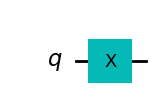

In [2]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

Veamos el resultado del circuito anterior. **Nota:** Aquí usamos `plot_bloch_multivector()` que toma el vector estado de un qubit en lugar del vector Bloch.

C:\Users\Francisco\AppData\Local\Temp\ipykernel_10444\1045836840.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


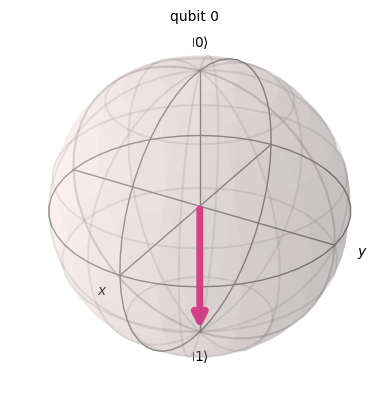

In [3]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

Podemos ver que el estado del qubit es $|1\rangle$ como se esperaba. Podemos pensar en esto como una rotación de $\pi$ radianes alrededor del *eje x* de la esfera de Bloch. La compuerta X también se suele llamar **compuerta NOT**, en referencia a su análogo clásico.

###  Las puertas Y & Z   <a id="ynzgatez"></a>

Al igual que la puerta X, las matrices de Pauli Y y Z también actúan como puertas Y y Z en nuestros circuitos cuánticos:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

Y, como era de esperar, también realizan respectivamente rotaciones de $\pi$ radianes alrededor de los ejes y y z de la esfera de Bloch.

A continuación se muestra un widget que muestra el estado de un qubit en la esfera de Bloch, pulsando uno de los botones se realizará la puerta en el qubit:

In [4]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

En Qiskit, podemos aplicar las puertas Y y Z a nuestro circuito utilizando el siguiente código:

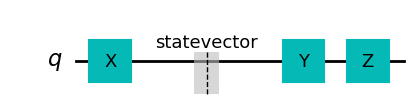

In [5]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw(output='mpl')

## Digresión: las bases X, Y & Z <a id="xyzbases"></a>

```{index} eigenvectors
```
**Recordatorio:** Valores y vectores (eigenvectores) propios de una matriz.

Hemos visto que multiplicando un vector por una matriz se obtiene un vector:

     
$$
    M|v\rangle  = |v'\rangle \leftarrow \text{vector nuevo}
    $$
    
    
Si elegimos los vectores y matrices adecuados, podemos encontrar un caso en el que esta multiplicación matricial sea lo mismo que hacer una multiplicación por un escalar:
      
$$
    M|v\rangle  = \lambda|v\rangle
    $$

(En la expresión de arriba, $M$ es una matriz, y $\lambda$ es un escalar).  Para una matriz $M$, cualquier vector que tenga esta propiedad se denomina <i>vector propio</i> de $M$. Por ejemplo, los vectores propios de la matriz Z son los estados $|0\rangle$ y $|1\rangle$:

$$
      \begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
      \end{aligned}
      $$

```{index} eigenstates
```

Dado que utilizamos vectores para describir el estado de nuestros qubits, en este contexto solemos llamar a estos vectores <i>eigenstates</i>. Los eigenvectores son muy importantes en la computación cuántica y es importante que los conozcas bien.


También puede notar que la compuerta Z parece no tener ningún efecto sobre nuestro qubit cuando está en cualquiera de estos dos estados (esto se comprueba cuando se ejecuta el widget anterior, que se observa al ejecutar el código en jupyter notebook, pero no se puede observar cuando se ve este tema en HTML). Esto se debe a que los estados $|0\rangle$ y $|1\rangle$ son los dos _eigenstates_ de la compuerta Z. 

De hecho, la _base computacional_ (la base formada por los estados $|0\rangle$ y $|1\rangle$) se llama a menudo la *base Z*.  Esta no es la única base que podemos utilizar, una base popular es la base X, formada por los *eigenstates* de la puerta X. Llamamos a estos dos vectores $|0\rangle$ y $|1\rangle$. Llamamos a estos dos vectores $|+\rangle$ y $|-\rangle$:




$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

Otra base menos utilizada es la formada por los estados propios de la puerta Y. Estos se llaman:

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

Que también esta denotada como:

$$ |i\rangle, \quad |-i\rangle$$


Con los siguientes valores

$$|i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i \end{bmatrix} $$

$$|-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \end{bmatrix}$$

Dejamos como ejercicio el calcularlas. De hecho, hay un número infinito de bases; para formar una, simplemente necesitamos dos vectores ortonormales. Los vectores propios de las matrices hermitianas y unitarias forman una base para el espacio vectorial. Debido a esta propiedad, podemos estar seguros de que los estados propios de la puerta X y la puerta Y forman una base para los estados de 1 qubit.

**NOTA**. Hay que tener en cuenta que los qubits forman un espacio vectorial, y que todo esto que estamos comentando, realmente son cambios de base de un espacio vectorial. Por lo tanto la teoría subyacente a todo esto está en cómo se cambia de base en estos espacios vectoriales. Para que el lector tenga una idea de cómo va este procedimiento se le invita a <a href="https://www.ugr.es/~lmerino/2-2.html" target="_blank"> leer este enlace </a>. 


### Quick Ejercicios

1. Verificar que $|+\rangle$ and $|-\rangle$ son en efecto eigenstates de la puerta X-gate.

2. Qué eigenvalues tienen? 

3. Encontrar los eigenstates de la puerta Y-gate, y sus coordenadas en la esfera de Bloch.

Usando sólo las puertas de Pauli es imposible mover nuestro qubit inicializado a cualquier estado que no sea $|0\rangle$ o $|1\rangle$, es decir, no podemos lograr la superposición. Esto significa que no podemos ver un comportamiento diferente al de un bit clásico. Para crear estados más interesantes necesitaremos más puertas cuánticas.



##  La puerta de Hadamard  <a id="hgate"></a>

La puerta de Hadamard (puerta H) es una puerta cuántica fundamental. Nos permite alejarnos de los polos de la esfera de Bloch y crear una superposición de $|0\rangle$ y $|1\rangle$. Tiene la siguiente matriz

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

Podemos ver que esto realiza las transformaciones de abajo:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

Esto puede considerarse como una rotación alrededor del vector de Bloch `[1,0,1]` (la línea entre los ejes x y z), o como una transformación del estado del qubit entre las bases X y Z.

Puedes jugar con estas puertas utilizando el widget que aparece a continuación (**NOTA**: si el código que sigue se ve en HTML, como ocurre en cualquier otro widget, no se puede apreciar el resultado, pues éste no va a ser dinámico en ese contexto. Para verlo de forma adecuada, se recomienda ejecutar el código en jupyter notebook):

In [6]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

### Quick Ejercicios

1.Escribe la puerta H-gate como un outer products de los vectores $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|-\rangle$.

2. Demuestre que aplicando la secuencia de puertas: HZH, a cualquier estado qubit es equivalente a aplicar una puerta X-gate.

3. Encontrar una combinación de puertas X, Z and H-gates que sea equivalente a la puerta Y-gate (ignorando la fase global).

## Digresion: Medidas en bases diferentes  <a id="measuring"></a>

Hemos visto que la base Z no es intrínsecamente especial, y que hay infinitas bases más. Del mismo modo con la medición, no siempre tenemos que medir en la base computacional (la base Z), podemos medir nuestros qubits en cualquier base.

Como ejemplo, probemos a medir en la base X. Podemos calcular la probabilidad de medir $|+\rangle$ o $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

Y después de la medición, la superposición se destruye. Como Qiskit sólo permite medir en la base Z, debemos crear la nuestra utilizando puertas Hadamard:

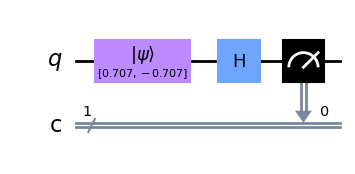

In [7]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw(output='mpl')

En los ejercicios rápidos anteriores, vimos que podíamos crear una puerta X intercalando nuestra puerta Z entre dos puertas H:


$$ X = HZH $$

Empezando en la base Z, la puerta H cambia nuestro qubit a la base X, la puerta Z realiza un NOT en la base X, y la puerta H final devuelve nuestro qubit a la base Z. Podemos comprobar que siempre se comporta como una puerta-X multiplicando las matrices:


$$
HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X
$$

Siguiendo la misma lógica, hemos creado una medición X transformando de la base X a la base Z antes de nuestra medición. Dado que el proceso de medición puede tener diferentes efectos dependiendo del sistema (por ejemplo, algunos sistemas siempre devuelven el qubit a $|0\rangle$ después de la medición, mientras que otros pueden dejarlo como el estado medido), el estado del qubit post-medición es indefinido y debemos restablecerlo si queremos utilizarlo de nuevo.

Hay otra forma de ver por qué la puerta de Hadamard nos lleva efectivamente de la base Z a la base X. Supongamos que el qubit que queremos medir en la base X está en el estado (normalizado) $a |0\rangle + b |1\rangle$. Para medirlo en base X, primero expresamos el estado como una combinación lineal de $|+\rangle$ y $|-\rangle$. Utilizando las relaciones $|0\\rangle = \frac{|+\rangle + |-\rangle}{\sqrt{2}}$ y $|1\rangle = \frac{|+\rangle - |-\rangle}{\sqrt{2}}$, el estado se convierte en $\frac{a + b}{\sqrt{2}}|+\rangle + \frac{a - b}{\sqrt{2}}|-\rangle$. Obsérvese que las amplitudes de probabilidad en base X pueden obtenerse aplicando una matriz de Hadamard sobre el vector de estado expresado en base Z.

Veamos a continuación el resultado obtenido

C:\Users\Francisco\AppData\Local\Temp\ipykernel_10444\1677050563.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector


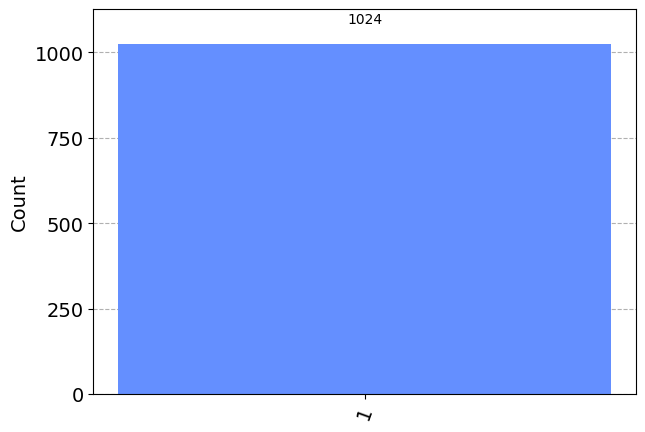

In [8]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

Inicializamos nuestro qubit en el estado $|-\rangle$, pero podemos ver que, después de la medición, hemos colapsado nuestro qubit al estado $|1\rangle$. Si ejecutamos la célula de nuevo, veremos el mismo resultado, ya que a lo largo de la base X, el estado $|-\rangle$ es un estado base y medirlo a lo largo de X siempre dará el mismo resultado.

Otra forma de ver esto es utilizando la teoría de <a href="https://www.ugr.es/~lmerino/2-2.html" target="_blank"> cambio de base de un espacio vectorial </a>. Según esto, debemos tener la matriz de cambio de base de base-Z a base-X es la matriz que define la puerta de Hadamard, por lo tanto se tiene lo siguiente:

$$\frac{1}{\sqrt(2)}\left[\begin{array}{cc}
1 & 1\\
1 & -1
\end{array}\right]\left[\begin{array}{c}
\frac{1}{\sqrt{2}}\\
-\frac{1}{\sqrt{2}}
\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}
0\\
\frac{2}{\sqrt{2}}
\end{array}\right]=\left[\begin{array}{c}
0\\
1
\end{array}\right]$$

Es decir el qubit colapsa al segundo qubit en una base-X

### Quick Ejercicios 

1.-Si inicializamos nuestro qubit en el estado $|+\rangle$, ¿cuál es la probabilidad de medirlo en el estado $|-\rangle$?

2.- Usa Qiskit para mostrar la probabilidad de medir un qubit $|0\rangle$ en los estados $|+\rangle$ y $|-\rangle$ (**Pista:** puede que quieras usar `.get_counts()` y `plot_histogram()`).

3.- Intenta crear una función que mida en la base Y

La medición en bases diferentes nos permite ver en acción el famoso *principio de incertidumbre de Heisenberg*. La certeza de medir un estado en la base Z elimina toda certeza de medir un estado específico en la base X, y viceversa. Un error común es pensar que la incertidumbre se debe a los límites de nuestro equipo, pero aquí podemos ver que la incertidumbre es en realidad parte de la naturaleza del qubit. 

Por ejemplo, si ponemos nuestro qubit en el estado $|0\rangle$, nuestra medida en la base Z será con certeza $|0\rangle$, ¡pero nuestra medida en la base X será completamente aleatoria! Del mismo modo, si ponemos nuestro qubit en el estado $|-\rangle$, nuestra medida en la base X es seguro que es $|-\rangle$, pero ahora cualquier medida en la base Z será completamente aleatoria.

En términos más generales: *Sea cual sea el estado de nuestro sistema cuántico, siempre hay una medición que tiene un resultado determinista*.

La introducción de la puerta H nos ha permitido explorar algunos fenómenos interesantes, pero todavía estamos muy limitados en nuestras operaciones cuánticas. Introduzcamos ahora un nuevo tipo de puerta:


## La puerta P-gate  <a id="rzgate"></a>

La puerta P (puerta de fase) está parametrizada, es decir, necesita un número ($\phi$) para saber exactamente qué hacer. La puerta-P realiza una rotación de $\phi$ alrededor de la dirección del eje Z. Tiene la forma de matriz:


$$
P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Donde $\phi$ es un número real.

Puede utilizar el widget de abajo para jugar con el P-gate, especifique $\phi$ utilizando el control deslizante (NOTA: como ya se ha dicho anteriormente, este widget se puede ver funcionando en un jupyter notebook, pero no en HTML):

In [9]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

En Qiskit, especificamos una puerta P utilizando `p(phi, qubit)`.:

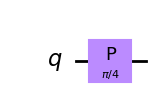

In [10]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw(output='mpl')

Usted puede notar que la puerta Z es un caso especial de la puerta P, con $\phi = \pi$. De hecho, hay tres puertas más comúnmente mencionados que vamos a mencionar en este capítulo, todos los cuales son casos especiales de la P-puerta:

## Las puertas I, S y T-gates  <a id="istgates"></a>

### La puerta I-gate  <a id="igate"></a>

En primer lugar está la puerta I (también conocida como "puerta Id" o "puerta de identidad"). Se trata simplemente de una puerta que no hace nada. Su matriz es la matriz de identidad:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Aplicar la puerta de identidad en cualquier parte de tu circuito no debería tener ningún efecto sobre el estado del qubit, por lo que es interesante que incluso se considere una puerta. Hay dos razones principales detrás de esto, una es que a menudo se utiliza en los cálculos, por ejemplo: demostrar que la puerta X es su propia inversa:


$$ I = XX $$

La segunda es que a menudo resulta útil especificar una operación de "no hacer nada" o "ninguna" cuando se trata de hardware real.

#### Quick Ejercicios

1. Cuales son los eigenstates of the I-gate?

### La puerta S-gates  <a id="sgate"></a>

La siguiente puerta a mencionar es la puerta S (a veces conocida también como la puerta  $\sqrt{Z}$-gate). Esta puerta es una puerta P-gate con $\phi = \pi/2$. Da un cuarto de vuelta alrededor de la esfera de Bloch. Es importante señalar que, a diferencia de todas las puertas presentadas hasta ahora en este capítulo  la puerta-S no es su propia inversa!.Como resultado, a menudo verá el S<sup>†</sup>-gate, (también “S-dagger”, “Sdg” o $\sqrt{Z}^\dagger$-gate). La puerta S<sup>†</sup>-gate es claramente una puerta P-gate with $\phi = -\pi/2$:

  

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$


El nombre  "$\sqrt{Z}$-gate" se debe a que se aplican sucesivamente dos puertas S-gates tiene el mismo efecto que una puerta Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

Esta notación es común en toda la computación cuántica.

Para añadir uan puerta S-gate en Qiskit, se hace de la siguiente manera:

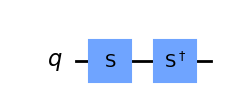

In [11]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw(output='mpl')

### La puerta T-gate <a id="tgate"></a>



La compuerta T-gate es una compuerta muy utilizada, es una puerta P-gate con $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

Como en el caso de la puerta S-gate, la puerta T-gate es a veces también conocida como la puerta  $\sqrt[4]{Z}$-gate.

En Qiskit se utiliza de la siguiente manera:

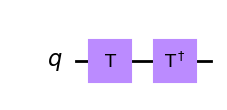

In [12]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw(output='mpl')

Puedes utilizar el widget que aparece a continuación para jugar con todas las puertas introducidas hasta ahora en este capítulo:

In [13]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

## La puerta U-gate  <a id="generalU"></a>

Como hemos visto antes, las puertas I, Z, S y T eran casos especiales de la puerta P, más general. Del mismo modo, la puerta U es la más general de todas las puertas cuánticas de un solo qubit. Es una puerta parametrizada de la forma:


$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

Cada puerta de este capítulo podría especificarse como $U(\theta,\phi,\lambda)$, pero es inusual ver esto en un diagrama de circuito, posiblemente debido a la dificultad para leerlo.


Como ejemplo, vemos algunos casos específicos de la puerta U en los que es equivalente a la puerta H y a la puerta P, respectivamente.

$$
\begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P
\end{aligned}
$$

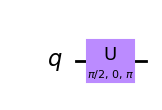

In [14]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw(output='mpl')

C:\Users\Francisco\AppData\Local\Temp\ipykernel_10444\1045836840.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


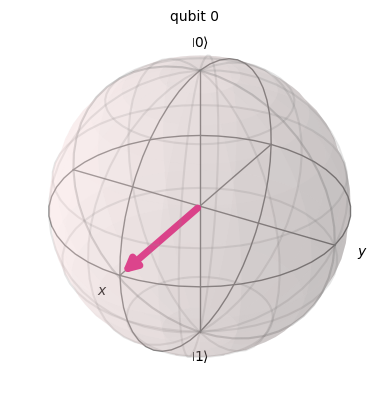

In [15]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

Debería ser obvio que hay un número infinito de puertas posibles, y que esto también incluye R<sub>x</sub> y R<sub>y</sub>-gates, aunque no se mencionan aquí. También debe tenerse en cuenta que no hay nada especial acerca de la base Z, excepto que ha sido seleccionada como la base de cálculo estándar. Qiskit también proporciona el equivalente X de las puertas S y Sd, es decir, la puerta SX y la puerta SXd, respectivamente. Estas compuertas dan un cuarto de vuelta con respecto al eje X alrededor de la esfera de Bloch y son un caso especial de la compuerta R<sub>x</sub>-gate.

Antes de ejecutarlas en el hardware cuántico real de IBM, todas las operaciones de un solo qubit se compilan a $I$ , $X$, $SX$ and $R_{z}$. Por este motivo, a veces se les denomina _physical gates_.


## Rotaciones estándar.

Las puertas de rotación estándar son las que definen rotaciones alrededor de las puertas de  Paulis $P={X,Y,Z\}$. Se definen como 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

**NOTA**: Para ver y entender porqué podemos poner la igualdad anterior [visitar este enlace](matricesexponenciales).

### Rotación entorno al eje X.

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u(\theta, -\pi/2,\pi/2)
$$

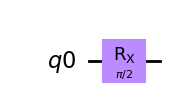

In [16]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw(output='mpl')

In [17]:
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')


job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

## Rotación entorno al eje Y.

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u(\theta,0,0)
$$

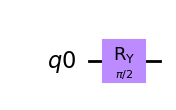

In [18]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw(output='mpl')

In [19]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

## Rotación entorno al eje Z.

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv p(\phi)
$$

Nótese que aquí hemos utilizado un equivalente ya que se diferencia de $p$ por una fase global $e^{-i \phi/2}$.

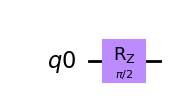

In [20]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw(output='mpl')

In [21]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

Tenga en cuenta que esto es diferente debido sólo a una fase global.

## Puertas de más de un qubit.

Veamos inicialmente algunos conceptos matemáticos.


### Conceptos matemáticos.

El espacio de un ordenador cuántico crece exponencialmente con el número de qubits. Para $n$ qubits, el espacio vectorial complejo tiene dimensión $d=2^n$. Para describir los estados de un sistema multiqubit, se utiliza el producto tensorial para "pegar" operadores y vectores base.

Empecemos considerando un sistema de 2 qubits. Dados dos operadores $A$ y $B$ que actúan cada uno sobre un qubit, el operador conjunto $A \otimes B$ que actúa sobre dos qubits es

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

donde $A_{jk}$ y $B_{lm}$ son los elementos matriciales de $A$ y $B$, respectivamente.

Análogamente, los vectores base para el sistema de 2 qubits se forman utilizando el producto tensorial de los vectores base para un solo qubit:

$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

Obsérvese que hemos introducido una abreviatura para el producto tensorial de vectores base, donde $\left|0\right\rangle \otimes \left|0\right\rangle$ se escribe como $\left|00\right\rangle$. El estado de un sistema de $n$ qubits puede describirse mediante el producto tensorial de $n$ pliegues de vectores base de un solo qubit. Obsérvese que los vectores base para un sistema de 2 qubits son de 4 dimensiones; en general, los vectores base de un sistema de $n$ qubits son de $2^{n}$ dimensiones, como se ha indicado anteriormente.

### Ordenación del vector base en Qiskit.

En la comunidad física, los qubits de un sistema multiqubit se ordenan normalmente con el primer qubit en el lado izquierdo del producto tensorial y el último qubit en el lado derecho. Por ejemplo, si el primer qubit está en el estado $\left|0\right\rangle$ y el segundo está en el estado $\left|1\right\rangle$, su estado conjunto sería $\left|01\right\rangle$. 

Sin embargo Qiskit no usa esta ordenación. Qiskit utiliza un orden ligeramente diferente de los qubits, en el que los qubits se representan desde el bit más significativo (MSB) a la izquierda hasta el bit menos significativo (LSB) a la derecha (little-endian). Esta representación es similar a la de las cadenas de bits de los ordenadores clásicos y permite convertir fácilmente las cadenas de bits en números enteros una vez realizadas las mediciones. Para el ejemplo que acabamos de dar, el estado conjunto se representaría como $\left|10\right\rangle$. Es importante destacar que *este cambio en la representación de los estados multi-qubit afecta a la forma en que las puertas multi-qubit se representan en Qiskit*, como se discute a continuación.

La representación utilizada en Qiskit enumera los vectores base en orden creciente de los enteros que representan. Por ejemplo, los vectores base para un sistema de 2 qubits se ordenarían como $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, y $\left|11\right\rangle$. Pensando en los vectores base como cadenas de bits, codifican los enteros 0,1,2 y 3, respectivamente.

### Operaciones controladas sobre qubits.

```{index} Puertas controladas
```

Una puerta multi-qubit común implica la aplicación de una puerta a un qubit, condicionada por el estado de otro qubit. Por ejemplo, podríamos querer invertir el estado del segundo qubit cuando el primer qubit está en $\left|0\right\rangle$. Estas puertas se conocen como _puertas controladas_. Las puertas multiqubit estándar consisten en puertas de dos qubits y puertas de tres qubits. Las puertas de dos qubits son:

- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

Para tres qubits se tienen las siguientes puertas:

- Toffoli gate 
- Fredkin gate

## Puertas para dos qubits.

*La mayoría de las puertas de dos qubits son del tipo controlado* (la puerta SWAP es la excepción). En general, una puerta controlada de dos qubits $C_{U}$ actúa para aplicar la matriz unitaria de un solo qubit $U$ al segundo qubit cuando el estado del primer qubit está en $\left|1\right\rangle$. Supongamos que $U$ tiene una representación matricial como sigue:

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

Podemos calcular la acción de $C_{U}$ de la siguiente manera. Recordemos que los vectores base para un sistema de dos qubits se ordenan como $\left|00\right\rangle, \left|01\right\rangle, \left|10\right\rangle, \left|11\right\rangle$. Supongamos que el **qubit de control** es el **qubit 0** (que, según la convención de Qiskit, está en el lado _derecho_ del producto tensorial). Si el qubit de control está en $\left|1\right\rangle$, $U$ debe aplicarse al **target** (qubit 1, en el lado izquierdo del producto tensorial). Por lo tanto, bajo la acción de $C_{U}$, los vectores base se transforman según el siguiente esquema:


$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

En forma matricial, la acción de $C_{U}$ es

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$

Para calcular los elementos de estas matrices

$$C_{(jk), (lm)} = \left(\underset{\text{qubit}~1}{\left\langle j \right|} \otimes \underset{\text{qubit}~0}{\left\langle k \right|}\right) C_{U} \left(\underset{\text{qubit}~1}{\left| l \right\rangle} \otimes \underset{\text{qubit}~0}{\left| m \right\rangle}\right),$$

calcular la acción de $C_{U}$ (dada anteriormente), y calcular los productos internos.

Como se muestra en los ejemplos siguientes, esta operación se implementa en Qiskit como `cU(q[0],q[1])`.

Si **qubit 1 es el control y qubit 0 es el objetivo**, entonces los vectores base se transforman según:

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$

lo que implica que la forma matricial de $C_{U}$ es

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

In [22]:
q = QuantumRegister(2)

(controladasPauli)=
### Puertas controladas de Pauli.

Serían las siguientes puertas para dos qubits.

```{index} controlled-X
```
#### Puertas controlled-X ó puertas controlled-NOT

La puerta Controlada-NOT invierte el qubit `objetivo` cuando el qubit de control está en el estado $\left|1\right\rangle$. Si tomamos el MSB como el qubit de control (por ejemplo, `cx(q[1],q[0])`), entonces la matriz se vería como

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

Sin embargo, cuando el LSB es el qubit de control, (por ejemplo `cx(q[0],q[1])`), esta puerta es equivalente a la siguiente matriz:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$


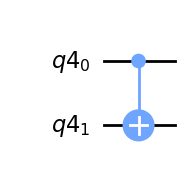

In [23]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

In [24]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

```{index} controlled-Y
```
#### Puertas controlled-Y.

Aplicar la puerta $Y$ al qubit objetivo si el qubit de control es el MSB.

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

o cuando el LSB es el control

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

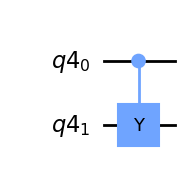

In [25]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw(output='mpl')

In [26]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

```{index} controlled-Z
```
(zcontrolada)=
#### Puertas controlled-Z (o controlled Phase-Flip).

```{index} controlled Phase-Flip, controlled-Z
```

Del mismo modo, la puerta Z controlada invierte la fase del qubit objetivo si el qubit de control es $\left|1\right\rangle$. La matriz tiene el mismo aspecto independientemente de si el MSB o LSB es el qubit de control:

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$

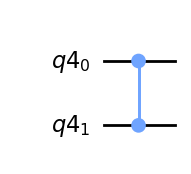

In [27]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

In [28]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

#### Puertas controlled-H (puerta controlada de Hadamard).
```{index} controlled Hadamard
```
Aplicar la puerta $H$ al qubit objetivo si el qubit de control es $\left|1\right\rangle$. A continuación se muestra el caso en que el control es el qubit LSB.

$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

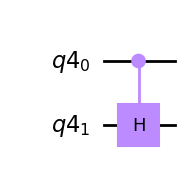

In [29]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
qc.draw(output='mpl')

In [30]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

### Puertas controladas por rotación.

#### Controlada por rotación sobre el eje Z.

Realiza la rotación alrededor del eje Z en el qubit objetivo (target) si el qubit de control (aquí LSB) es $\left|1\right\rangle$.

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

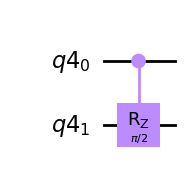

In [31]:
qc = QuantumCircuit(q)
qc.crz(pi/2,q[0],q[1])
qc.draw(output='mpl')

In [32]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

#### Controlada fase rotación.

Realiza una rotación de fase si ambos qubits están en el estado $\left|11\right\rangle$. La matriz tiene el mismo aspecto independientemente de si el MSB o el LSB es el qubit de control.

$$
C_{p}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

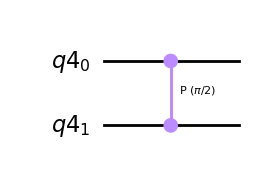

In [33]:
qc = QuantumCircuit(q)
qc.cp(pi/2,q[0], q[1])
qc.draw(output='mpl')

In [34]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

#### Controlada rotación u.

Realiza una rotación controlada-$u$ en el qubit objetivo si el qubit de control (aquí LSB) es $\left|1\right\rangle$. 

$$
C_{u}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

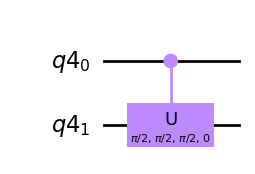

In [35]:
qc = QuantumCircuit(q)
qc.cu(pi/2, pi/2, pi/2, 0, q[0], q[1])
qc.draw(output='mpl')

In [36]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   , -0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

### Puerta SWAP.
```{index} SWAP puerta
```
La puerta SWAP intercambia los dos qubits. Transforma los vectores base como sigue:

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

que da una representación matricial de la forma:

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

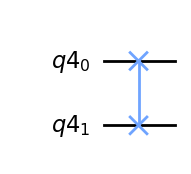

In [37]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])
qc.draw(output='mpl')

In [38]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

## Puertas de tres qubits.

Hay dos puertas de tres qubits que se utilizan habitualmente . 

Para tres qubits, los vectores base se ordenan como

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

que, como cadenas de bits, representan los enteros $0,1,2,\cdots, 7$. De nuevo, Qiskit utiliza una representación en la que el primer qubit está en el lado más a la derecha del producto tensorial y el tercer qubit está en el lado más a la izquierda:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Puerta de Toffoli (ccx gate).
```{index} Toffoli puerta, ccx puerta
```
La <a href="https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate" target="_blank"> puerta de Toffoli </a>invierte el tercer qubit si los dos primeros qubits (LSB) son ambos $\left|1\right\rangle$.

En forma matricial, esta puerta es de la siguiente forma:

$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$



In [39]:
q = QuantumRegister(3)

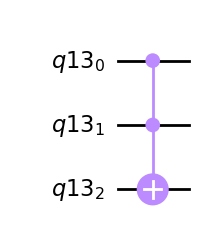

In [40]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

In [41]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### Puerta controlada swap (puerta Fredkin).
```{index} Fredkin puerta
```
La <a href="https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate" target="_blank"> puerta de Fredin </a> o *controlled swap gate*  intercambia el segundo y tercer qubit si el primer qubit (LSB) es $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

En formato matricial, esta puerta tiene la siguiente forma:


$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

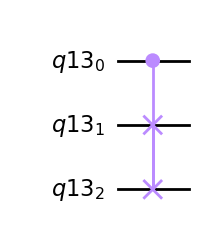

In [42]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw(output='mpl')

In [43]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

## Operaciones no unitarias.

Ahora que hemos repasado todas las operaciones unitarias de los circuitos cuánticos, también tenemos acceso a las *operaciones no unitarias*. Entre ellas se incluyen las *mediciones, el restablecimiento de qubits (reset) y las operaciones condicionales clásicas*.

In [44]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

### Medidas.

No tenemos acceso a toda la información cuando realizamos una medición en un ordenador cuántico. El estado cuántico se proyecta sobre la base estándar. A continuación se muestran dos ejemplos que muestran un circuito preparado en un estado de base y el ordenador cuántico preparado en un estado de superposición.

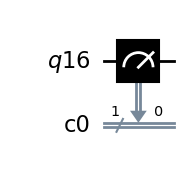

In [45]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw(output='mpl')

In [46]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

El simulador predice que el 100% de las veces el registro clásico devuelve 0.

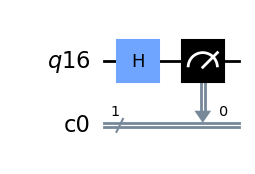

In [47]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw(output='mpl')

In [48]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 514, '1': 510}

El simulador predice que el 50% de las veces el registro clásico devuelve 0 ó 1.

### Reset.

También es posible restablecer los qubits al estado |0⟩ en mitad del cálculo. Ten en cuenta que el restablecimiento no es una operación Gate, ya que es irreversible.

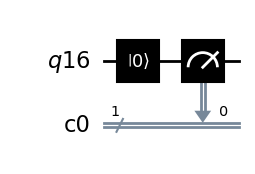

In [49]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw(output='mpl')

In [50]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

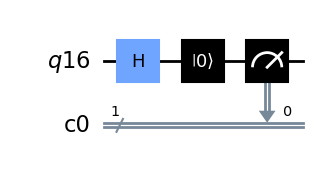

In [51]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0]) #restablecemos al qubit al estado |o>
qc.measure(q, c)
qc.draw(output='mpl')

In [52]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

Aquí vemos que para ambos circuitos el simulador siempre predice que la salida está al 100% en el estado 0

### Operaciones condicionales.

También es posible realizar operaciones condicionadas al estado del registro clásico

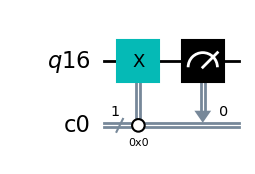

In [53]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw(output='mpl')

Aquí el bit clásico siempre toma el valor 0, por lo que el estado del qubit siempre se invierte.

In [54]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

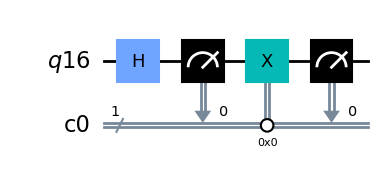

In [55]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw(output='mpl')

In [56]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

Aquí el bit clásico por la primera medición es aleatorio pero la operación condicional resulta en que el qubit se pone determinísticamente en $\left|1\right\rangle$.

## Inicialización manual.

¿Qué pasa si queremos inicializar un registro qubit a un estado arbitrario? Un estado arbitrario para $n$ qubits puede ser especificado por un vector de $2^n$ amplitudes, donde la suma de amplitudes-normas-cuadrado es igual a 1. Por ejemplo, se puede preparar el siguiente estado de tres qubits:

$$\left|\psi\right\rangle = \frac{i}{4}\left|000\right\rangle + \frac{1}{\sqrt{8}}\left|001\right\rangle + \frac{1+i}{4}\left|010\right\rangle + \frac{1+2i}{\sqrt{8}}\left|101\right\rangle + \frac{1}{4}\left|110\right\rangle$$

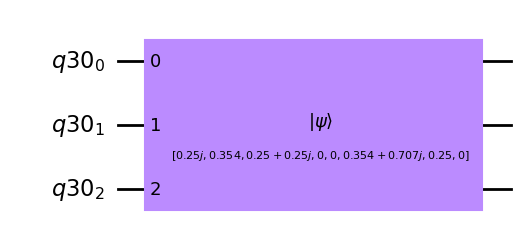

In [57]:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.draw(output='mpl')

In [58]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state 

array([1.66533454e-16+2.50000000e-01j, 3.53553391e-01-5.55111512e-17j,
       2.50000000e-01+2.50000000e-01j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 3.53553391e-01+7.07106781e-01j,
       2.50000000e-01-9.02056208e-17j, 0.00000000e+00+0.00000000e+00j])

## Fidelity
```{index} Fidelity
```
<a href="https://en.wikipedia.org/wiki/Fidelity_of_quantum_states" target="-blank">Fidelity </a>es útil para comprobar si dos estados son iguales o no.

Para los estados cuánticos (puros) $\left|\psi_1\right\rangle$ y $\left|\psi_2\right\rangle$, la fidelidad es

$$
F\left(\left|\psi_1\right\rangle,\left|\psi_2\right\rangle\right) = \left|\left\langle\psi_1\middle|\psi_2\right\rangle\right|^2.
$$

La fidelidad es igual a $1$ si y sólo si dos estados son iguales.

In [59]:
from qiskit.quantum_info import state_fidelity

state_fidelity(desired_vector,qc_state)

1.0000000000000004

### Cómo se consigue esta inicialización.

¿Cómo se genera entre bastidores el estado deseado? Existen varios métodos para hacerlo. Qiskit utiliza un <a href="https://arxiv.org/abs/quant-ph/0406176" target="_blank">método propuesto por Shende et al </a>.

Aquí, la idea es suponer que el registro cuántico ha comenzado desde nuestro estado deseado, y construir un circuito que lo lleva al estado $\left|00..0\right\rangle$. El circuito de inicialización es entonces la inversa de dicho circuito.

Para llevar un estado cuántico arbitrario al estado cero en la base computacional, realizamos un procedimiento iterativo que desenreda los qubits del registro uno a uno. Sabemos que cualquier estado arbitrario de un solo qubit $\left|\rho\right\rangle$ puede llevarse al estado $\left|0\right\rangle$ utilizando una rotación de $\phi$ grados sobre el eje Z seguida de una rotación de $\theta$ grados sobre el eje Y:

$$R_y(-\theta)R_z(-\phi)\left|\rho\right\rangle = re^{it}\left|0\right\rangle$$

Como ahora estamos tratando con $n$ qubits en lugar de sólo 1, debemos factorizar el vector de estado para separar el bit menos significativo (LSB):

$$\begin{align*}
 \left|\psi\right\rangle =& \alpha_{0_0}\left|00..00\right\rangle + \alpha_{0_1}\left|00..01\right\rangle + \alpha_{1_0}\left|00..10\right\rangle + \alpha_{1_1}\left|00..11\right\rangle + ... \\&+ \alpha_{(2^{n-1}-1)_0}\left|11..10\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|11..11\right\rangle \\
=& \left|00..0\right\rangle (\alpha_{0_0}\left|0\right\rangle + \alpha_{0_1}\left|1\right\rangle) + \left|00..1\right\rangle (\alpha_{1_0}\left|0\right\rangle + \alpha_{1_1}\left|1\right\rangle) + ... \\&+ \left|11..1\right\rangle (\alpha_{(2^{n-1}-1)_0}(\left|0\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|1\right\rangle) \\
=& \left|00..0\right\rangle\left|\rho_0\right\rangle + \left|00..1\right\rangle\left|\rho_1\right\rangle + ... + \left|11..1\right\rangle\left|\rho_{2^{n-1}-1}\right\rangle
\end{align*}$$

Ahora cada uno de los estados single-qubit $\left|\rho_0\right\rangle$, ..., \left|\rho_{2^{n-1}-1}\right\rangle$ puede ser llevado a $\left|0\right\rangle$ encontrando los ángulos $\phi$ y $\theta$ apropiados según la ecuación anterior. Hacer esto simultáneamente en todos los estados equivale a la siguiente unitaria, que desenreda el LSB:

$$U = \begin{pmatrix} 
R_{y}(-\theta_0)R_{z}(-\phi_0) & & & &\\  
& R_{y}(-\theta_1)R_{z}(-\phi_1) & & &\\
& . & & &\\
& & . & &\\
& & & & R_y(-\theta_{2^{n-1}-1})R_z(-\phi_{2^{n-1}-1})
\end{pmatrix} $$

Por lo tanto,

$$U\left|\psi\right\rangle = \begin{pmatrix} r_0e^{it_0}\\ r_1e^{it_1}\\ . \\ . \\ r_{2^{n-1}-1}e^{it_{2^{n-1}-1}} \end{pmatrix}\otimes\left|0\right\rangle$$

U puede implementarse como una puerta "multiplexora cuántica", ya que es una matriz diagonal de bloques. En el formalismo del multiplexor cuántico, una matriz diagonal de bloques de tamaño $2^n \times 2^n$, y que consta de $2^s$ bloques, es equivalente a un multiplexor con $s$ qubits de selección y $n-s$ qubits de datos. Dependiendo del estado de los qubits de selección, los bloques correspondientes se aplican a los qubits de datos. Un multiplexor de este tipo puede implementarse tras una descomposición recursiva en puertas primitivas de cx, rz y ry.

## Recursos adicionales.

Puede encontrar una hoja de trucos creada por la comunidad con algunas de las puertas cuánticas más comunes y sus propiedades [en este enlace](https://raw.githubusercontent.com/qiskit-community/qiskit-textbook/main/content/ch-states/supplements/single-gates-cheatsheet.pdf).

También se puede ver un desarrollo de las puertas de qiskit <a href="https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html" target="_blank">en este enlace</a>

In [60]:
import qiskit.tools.jupyter
%qiskit_version_table